# Mortality caused by road traffic injury (per 100,000 people)

Datas are from World Bank, [Mortality caused by road traffic injury (per 100,000 people)](http://www.randalolson.com/2015/07/14/rethinking-the-population-pyramid/).

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# This is a custom matplotlib style that I use for most of my charts
plt.style.use('https://gist.githubusercontent.com/rhiever/d0a7332fe0beebfdc3d5/raw/205e477cf231330fe2f265070f7c37982fd3130c/tableau10.mplstyle')

injury_data = pd.read_csv('data.csv')
injury_data.head()


Bad key "axes.color_cycle" on line 17 in
https://gist.githubusercontent.com/rhiever/d0a7332fe0beebfdc3d5/raw/205e477cf231330fe2f265070f7c37982fd3130c/tableau10.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


,Country Name,2000,2005,2010,2015
0,Afghanistan,15.5,15.3,15.3,15.2
1,Angola,20.0,20.5,20.8,24.4
2,Albania,15.4,15.9,15.4,13.6
3,Benin,28.0,29.2,29.8,27.7
4,Belize,30.8,34.6,13.5,21.3


Include Country name, and datas of four years.

''

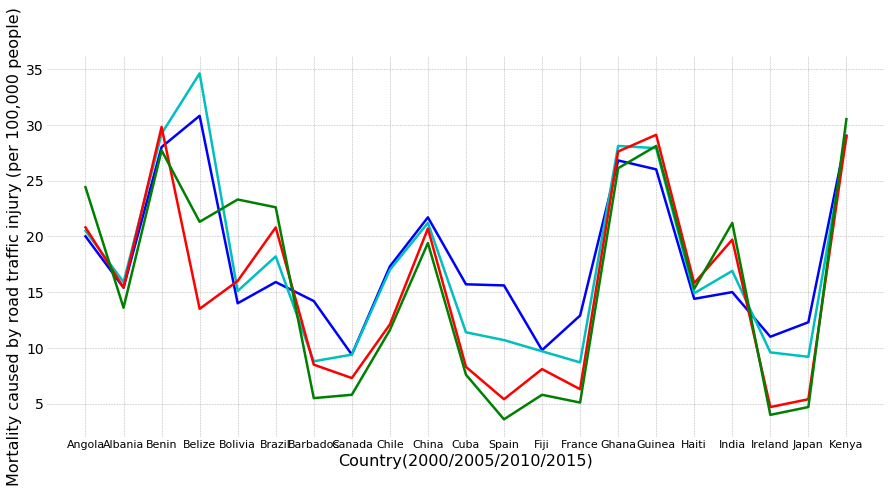

In [48]:
injury_data = pd.read_csv('data.csv')
injury_data.head()
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(111)

plt.plot(injury_data['2000'],'r-',color='b')
plt.plot(injury_data['2005'],'r-',color='c')
plt.plot(injury_data['2010'],'r-',color='r')
plt.plot(injury_data['2015'],'r-',color='g')

#plt.xlim(-0.6, 20.6)
#plt.ylim(-12.1e6, 12.1e6)
#plt.grid(False, axis='x')
plt.xticks(np.arange(0, 21), injury_data['Country Name'], fontsize=11)
#plt.yticks(np.arange(-12e6, 13e6, 2e6),
           #['{}m'.format(int(abs(x) / 1e6)) if x != 0 else 0 for x in np.arange(-12e6, 13e6, 2e6)])
plt.xlabel('Country(2000/2005/2010/2015)')
plt.ylabel('Mortality caused by road traffic injury (per 100,000 people)')

plt.savefig('pop_pyramid_rotated.pdf')
;

Show by line chart

''

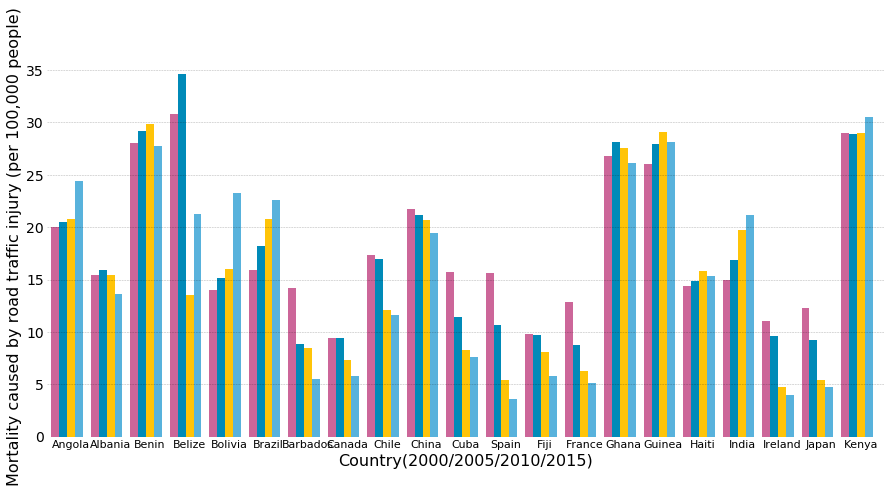

In [30]:
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(111)

for (i, row) in injury_data.iterrows():
    plt.bar([i - 0.4, i -0.2,i,i+0.2], [row['2000'], row['2005'],row['2010'],row['2015']],
            color=['#CC6699', '#008AB8','#FFC408','#58B2DC'], width=0.2, align='center', edgecolor='none')
    
plt.xlim(-0.6, 20.6)
plt.xticks(range(0, 21), injury_data['Country Name'],size=11)
plt.grid(False, axis='x')
#plt.yticks(np.arange(0, 13e6, 1e6),
 #          ['{}m'.format(int(x / 1e6)) if x > 0 else 0 for x in np.arange(0, 13e6, 1e6)])
plt.xlabel('Country(2000/2005/2010/2015)')
plt.ylabel('Mortality caused by road traffic injury (per 100,000 people)')

plt.savefig('pop_pyramid_grouped.pdf')
;

###3) Relative trends between the categories can be masked by displaying absolute values.

show by bar graph

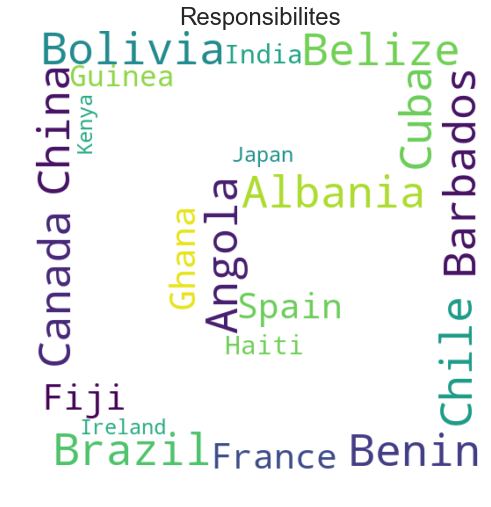

In [14]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
injury_data = pd.read_csv('data.csv')
G = np.array(Image.open('../PJ/google-icon.png'))
# I spent a while to realize that the image must be black-shaped to be a mask

Res_AN = ' '.join(injury_data['Country Name'].tolist())

sns.set(rc={'figure.figsize':(11.7,8.27)})

wordcloud = WordCloud(mask=G,background_color="white").generate(Res_AN)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Responsibilites',size=24)
plt.show()